<a href="https://colab.research.google.com/github/Thisuli-Amanethmi/ML-CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

print("---------------------")

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [52]:
X.head(30) # independent variables

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [53]:
y.head(30) # dependent variable

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


# **Data Exploration**

In [9]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


According to the above information, there are missing values in 3 columns. They are,
 1.  workclass - 47 879
 2.  occupation - 47876
 3.  native-country - 48 568

In total there should be 48 842 entries.

**Value count function** --> "?" represent a missing value

In [11]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [14]:
X['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [15]:
X['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [16]:
X['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [17]:
X['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [18]:
X['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [19]:
y['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

<Axes: xlabel='income', ylabel='count'>

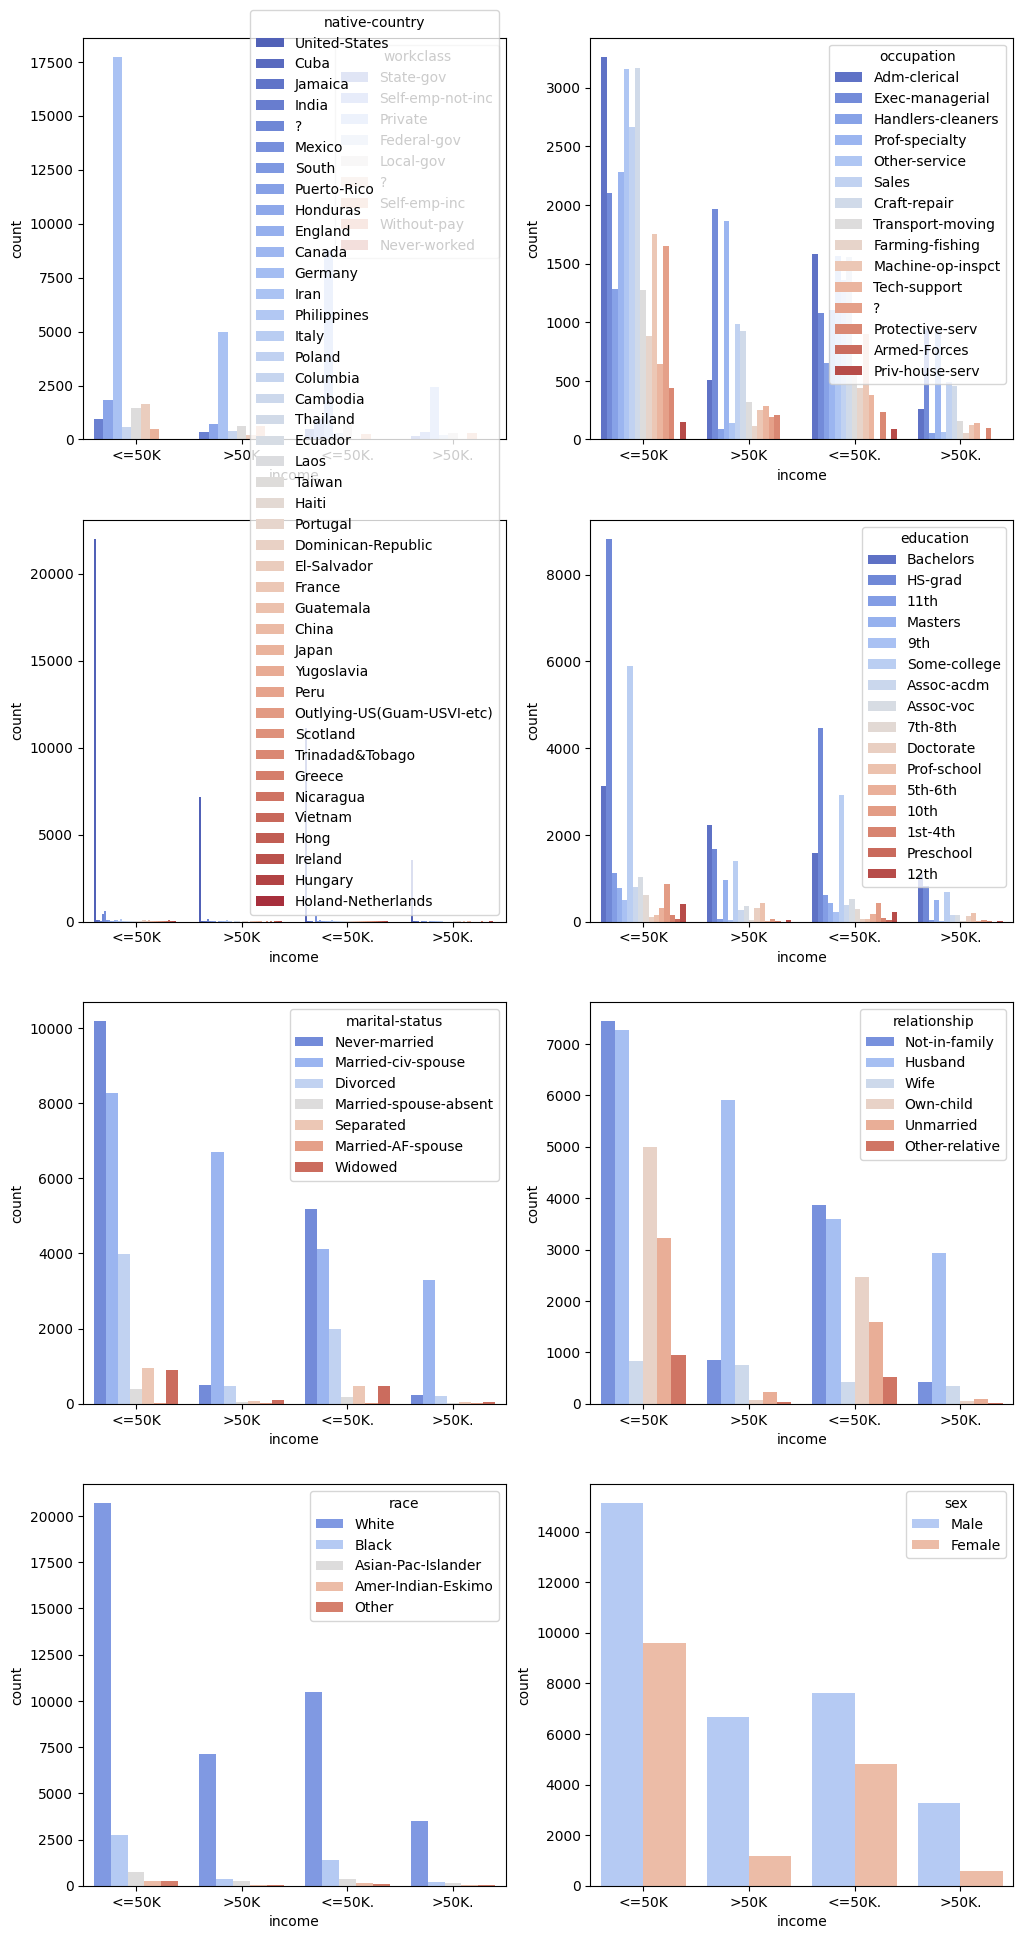

In [65]:
# combing both X and y into a single dataframe
data = X.copy()
data['income'] = y

# create a figure with 8 subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

sns.countplot(x='income', palette='coolwarm', hue='workclass', data=data, ax=axes[0][0])
sns.countplot(x='income', palette='coolwarm', hue='occupation', data=data, ax=axes[0][1])
sns.countplot(x='income', palette='coolwarm', hue='native-country', data=data, ax=axes[1][0])
sns.countplot(x='income', palette='coolwarm', hue='education', data=data, ax=axes[1][1])
sns.countplot(x='income', palette='coolwarm', hue='marital-status', data=data, ax=axes[2][0])
sns.countplot(x='income', palette='coolwarm', hue='relationship', data=data, ax=axes[2][1])
sns.countplot(x='income', palette='coolwarm', hue='race', data=data, ax=axes[3][0])
sns.countplot(x='income', palette='coolwarm', hue='sex', data=data, ax=axes[3][1])


# **Data Preprocessing**

**Handling missing values**

In [66]:
# replace "?" with mode

data['workclass'] = data['workclass'].replace('?', 'Private')
data['occupation'] = data['occupation'].replace('?', 'Prof-specialty')
data['native-country'] = data['native-country'].replace('?', 'United-States')


In [67]:
data.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Feature Engineering**

In [68]:
# education
# there are 16 categories

data.education = data.education.replace(['Preschool', '1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th',  '12th'], 'School')
data.education = data.education.replace('HS-grad', 'High School')
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher Education')
data.education = data.education.replace('Bachelors', 'Under Graduation')
data.education = data.education.replace('Masters', 'Graduation')
data.education = data.education.replace('Doctorate', 'Doc')


data['education'].value_counts()


High School         15784
Higher Education    15374
Under Graduation     8025
School               6408
Graduation           2657
Doc                   594
Name: education, dtype: int64

In [69]:
# marital-status
# there are 7 categories

data['marital-status'] = data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
data['marital-status'] = data['marital-status'].replace('Never-married', 'Unmarried')
data['marital-status'] = data['marital-status'].replace(['Divorced', 'Separated', 'Widowed', 'Married-spouse-absent'], 'Other')


data['marital-status'].value_counts()


Married      22416
Unmarried    16117
Other        10309
Name: marital-status, dtype: int64

In [70]:
# income
# there are 4 categories

data['income'] = data['income'].replace(['<=50K', '<=50K.'], '<=50K') # less than or equals to 50k
data['income'] = data['income'].replace(['>50K', '>50K.'], '>50K') # greater than 50k


data['income'].value_counts()


<=50K    37155
>50K     11687
Name: income, dtype: int64

In [71]:
# income
# there are 2 categories
# converting them into neumeruc data. 0 & 1

data['income'] = data['income'].replace('<=50K', 0) # less than or equals to 50k
data['income'] = data['income'].replace('>50K', 1) # greater than 50k


data['income'].value_counts()


0    37155
1    11687
Name: income, dtype: int64

In [74]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Under Graduation,13,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Under Graduation,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,High School,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Under Graduation,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Graduation,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,School,5,Other,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,High School,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Graduation,14,Unmarried,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Under Graduation,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# **Data Visualization**

In [77]:
data.corr() # for numerical data

# values greater than 0 - positive correlation (X increase = Y increase)
# values closer to +1 - stronger positive correlation

# values less than 0 - negative correlation (X increate = Y decrease)
# values closer to 11 - stronger negative correlation

# values near 0 - no correlation


<ipython-input-77-4407b7b5d383>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # for neumeric data


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<ipython-input-80-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

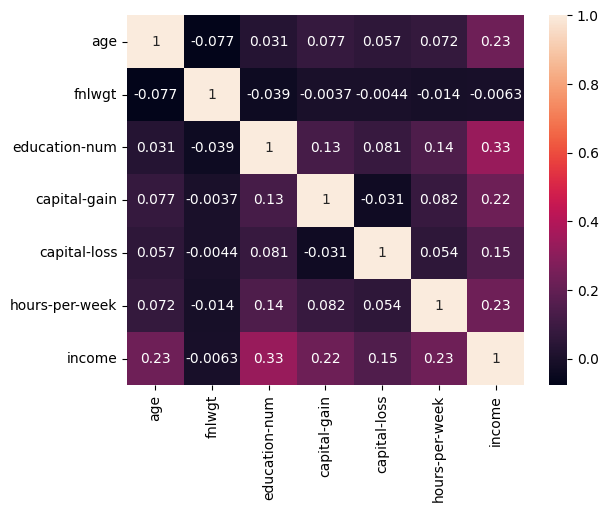

In [80]:
sns.heatmap(data.corr(), annot=True)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >, <Axes: >]],
      dtype=object)

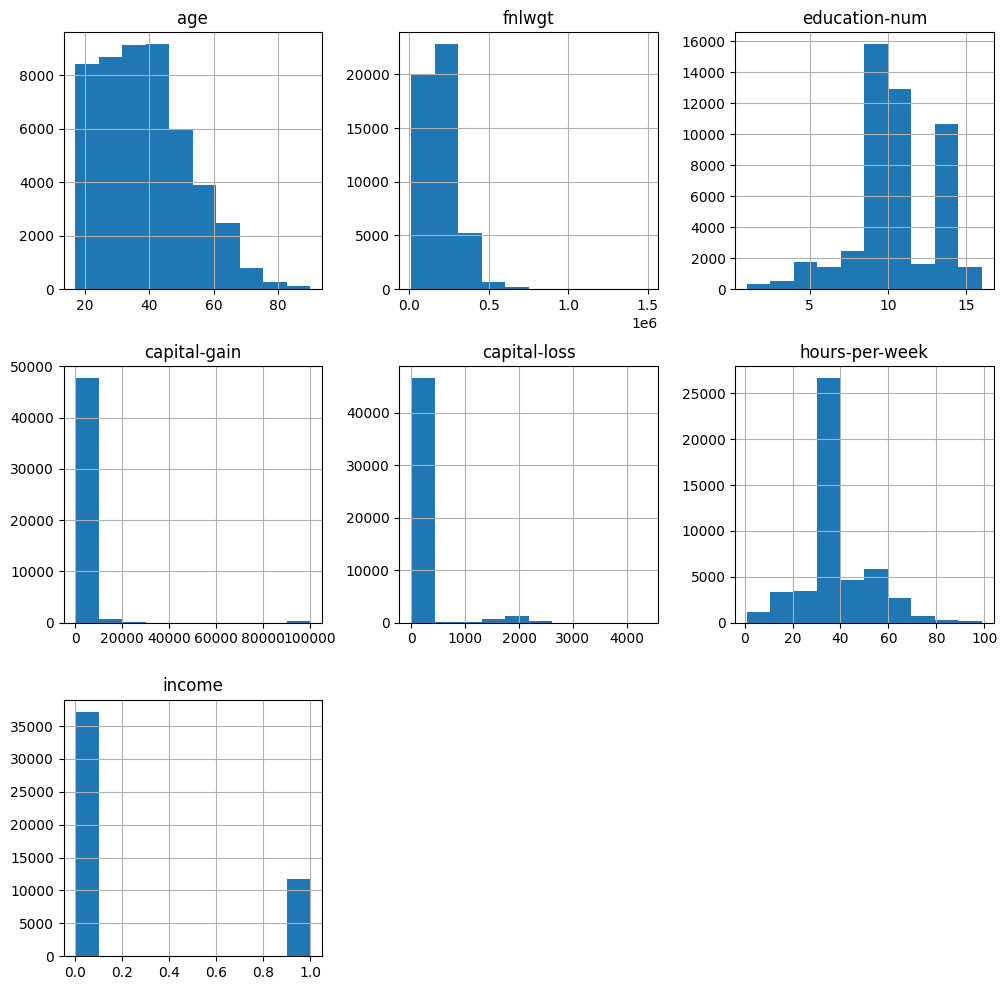

In [89]:
data.hist(figsize=(12,12), layout=(3,3), sharex=False) # for numerical data


age                  Axes(0.125,0.653529;0.227941x0.226471)
fnlwgt            Axes(0.398529,0.653529;0.227941x0.226471)
education-num     Axes(0.672059,0.653529;0.227941x0.226471)
capital-gain         Axes(0.125,0.381765;0.227941x0.226471)
capital-loss      Axes(0.398529,0.381765;0.227941x0.226471)
hours-per-week    Axes(0.672059,0.381765;0.227941x0.226471)
income                   Axes(0.125,0.11;0.227941x0.226471)
dtype: object

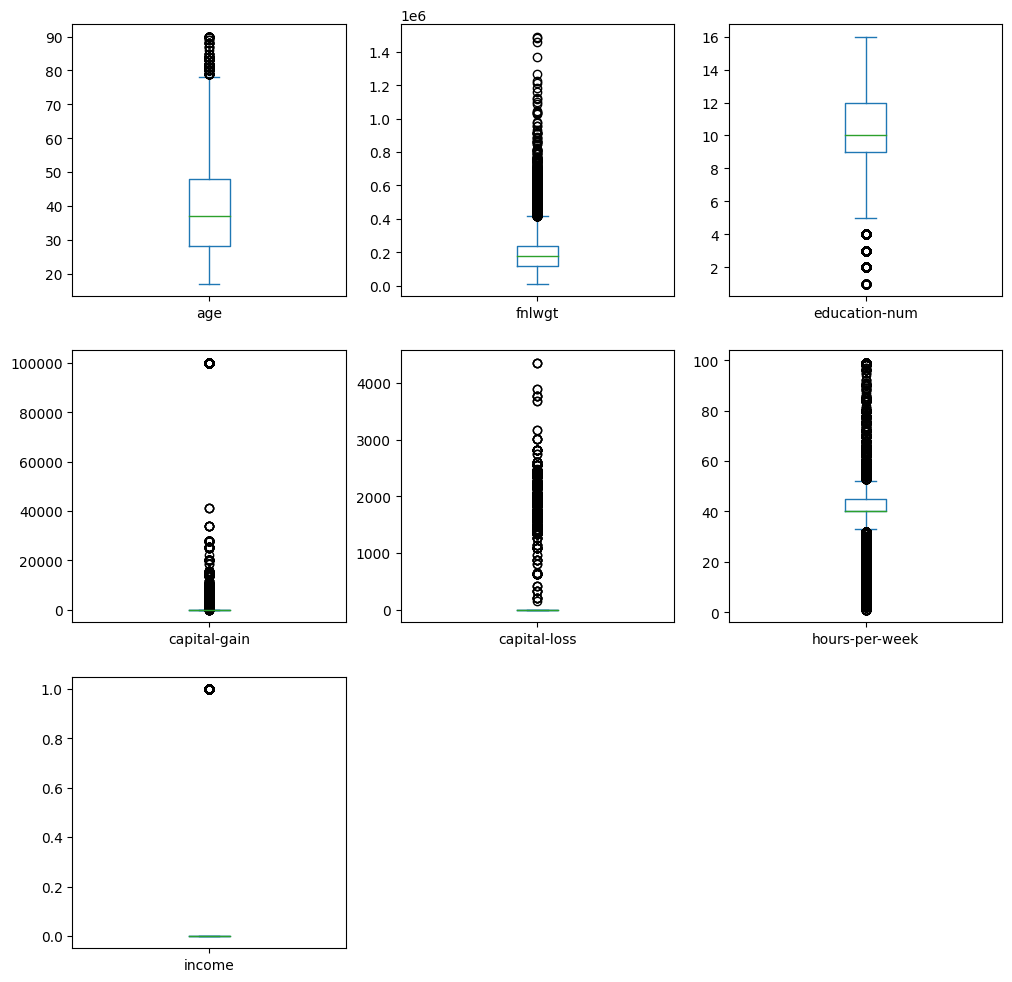

In [90]:
# to identify outliers
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True) # for numerical data

# outliers will make boased predictions. so we have to remove them.


In [95]:
px.pie(data, values='education-num', names='education', title='Percentage of education', color_discrete_sequence=px.colors.qualitative.T10)


<Axes: xlabel='race', ylabel='count'>

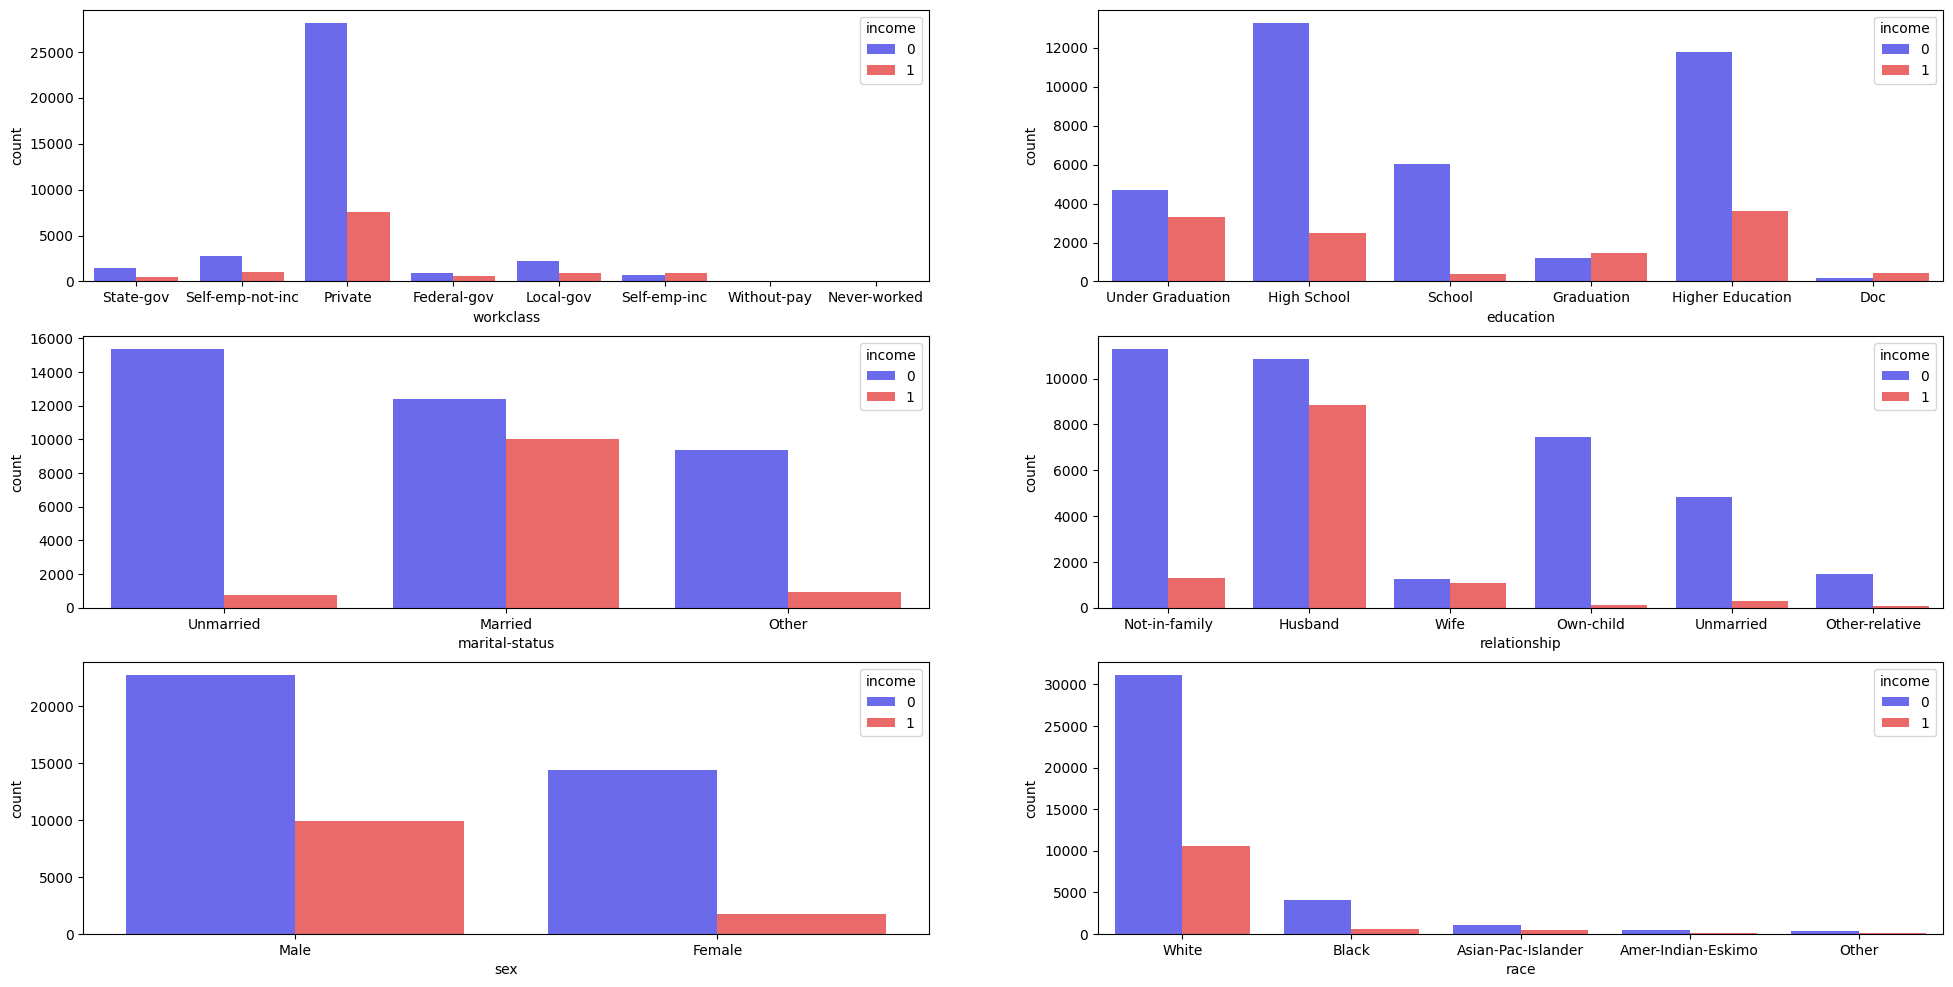

In [120]:
# create a figure with 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(24, 12))

# countplot is like a histogram for categorical data
sns.countplot(x='workclass', hue='income', data=data, palette='seismic', ax=axes[0][0])
sns.countplot(x='education', hue='income', data=data, palette='seismic', ax=axes[0][1])
sns.countplot(x='marital-status', hue='income', data=data, palette='seismic', ax=axes[1][0])
sns.countplot(x='relationship', hue='income', data=data, palette='seismic', ax=axes[1][1])
sns.countplot(x='sex', hue='income', data=data, palette='seismic', ax=axes[2][0])
sns.countplot(x='race', hue='income', data=data, palette='seismic', ax=axes[2][1])


<Axes: xlabel='native-country', ylabel='count'>

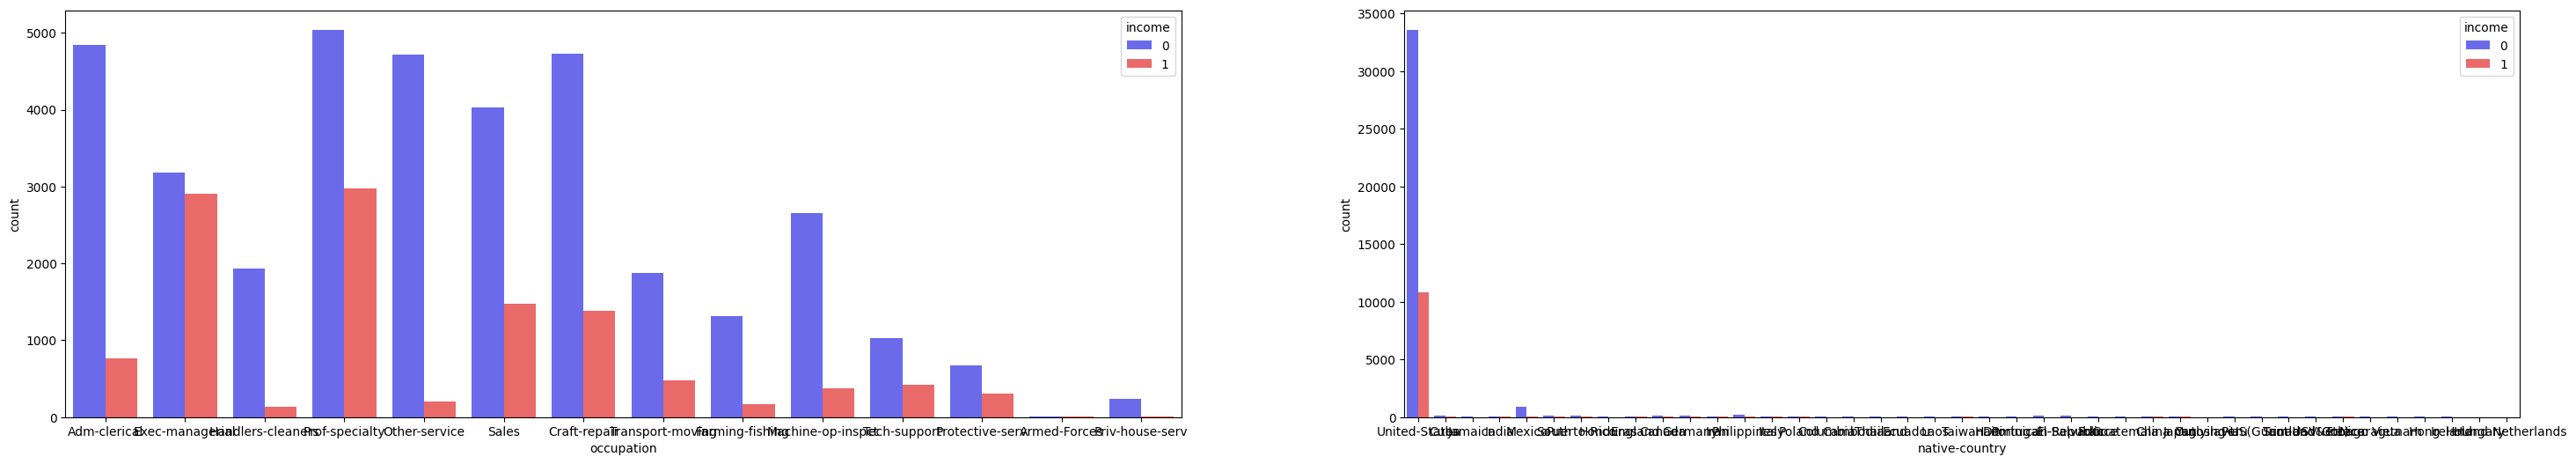

In [131]:
# create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(36, 6))

# countplot is like a histogram for categorical data
sns.countplot(x='occupation', hue='income', data=data, palette='seismic', ax=axes[0])
sns.countplot(x='native-country', hue='income', data=data, palette='seismic', ax=axes[1])

# **Model Building Process**

In [132]:
A = data.drop(['income'], axis=1) # independent variables(X)
B = data['income'] # dependent variable(Y)

In [133]:
# feature scalling

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [135]:
data1 = data.copy()

data1 = data1.apply(LabelEncoder().fit_transform) # to convert categorical data into numerical data
data1.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,5,12,2,0,1,4,1,27,0,39,38,0
1,33,5,3788,5,12,0,3,0,4,1,0,0,12,38,0
2,21,3,18342,2,8,1,5,1,4,1,0,0,39,38,0
3,36,3,19995,4,6,0,5,0,2,1,0,0,39,38,0
4,11,3,25405,5,12,0,9,5,2,0,0,0,39,4,0


In [139]:
ss = StandardScaler().fit(data1.drop('income', axis=1))

In [140]:
A = ss.transform(data1.drop('income', axis=1))
B = data['income']

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=0.3, random_state=40)


# **Naive Bayes**

In [ ]:

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)


In [157]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

model_nb = naive_bayes.fit(X_train, y_train)
prediction_nb = model_nb.predict(X_test)

print('Accuracy on training data: {:.3f}'.format(naive_bayes.score(X_train, y_train)))
print('Accuracy on testing data: {:.3f}'.format(naive_bayes.score(X_test, y_test)))


Accuracy on training data: 0.828
Accuracy on testing data: 0.818


In [158]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Martix')
print(confusion_matrix(y_test, prediction_nb))

# [tp   fn]
# [fp   tn]

print(" ")
print(" ")
print(" ")

print('Classification Report')
print(classification_report(y_test, prediction_nb))


Confusion Martix
[[10224   884]
 [ 1778  1767]]
 
 
 
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11108
           1       0.67      0.50      0.57      3545

    accuracy                           0.82     14653
   macro avg       0.76      0.71      0.73     14653
weighted avg       0.81      0.82      0.81     14653



In [161]:
# for class 0 (<=50k)

# Precision = tp/(tp+fp)
print('Precision = ', 10224/(10224+1778))

# Recall = tp/(tp+fn)
print('Recall = ', 10224/(10224+884))


Precision =  0.8518580236627229
Recall =  0.920417716960749


In [163]:
# for class 1 (>50k)

# Precision = tp/(tp+fp)
print('Precision = ', 1767/(1767+884))

# Recall = tp/(tp+fn)
print('Recall = ', 1767/(1767+1778))


Precision =  0.6665409279517164
Recall =  0.4984485190409027


# **Random Forest Classifier**

In [164]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model_rfc = rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)

print('Accuracy on training data: {:,.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy on testing data: {:,.3f}'.format(rfc.score(X_test, y_test)))


Accuracy on training data: 1.000
Accuracy on testing data: 0.851


In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Martix')
print(confusion_matrix(y_test, prediction_rfc))

# [tp   fn]
# [fp   tn]

print(" ")
print(" ")
print(" ")

print('Classification Report')
print(classification_report(y_test, prediction_rfc))


Confusion Martix
[[10335   773]
 [ 1405  2140]]
 
 
 
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11108
           1       0.73      0.60      0.66      3545

    accuracy                           0.85     14653
   macro avg       0.81      0.77      0.78     14653
weighted avg       0.85      0.85      0.85     14653



In [166]:
# for class 0 (<=50k)

# Precision = tp/(tp+fp)
print('Precision = ', 10329/(10329+1407))

# Recall = tp/(tp+fn)
print('Recall = ', 10329/(10329+779))


Precision =  0.8801124744376279
Recall =  0.9298703637018365


In [167]:
# for class 1 (>50k)

# Precision = tp/(tp+fp)
print('Precision = ', 2138/(2138+779))

# Recall = tp/(tp+fn)
print('Recall = ', 2138/(2138+1407))


Precision =  0.7329448063078505
Recall =  0.6031029619181947
